(-0.5, 1107.5, 1476.5, -0.5)

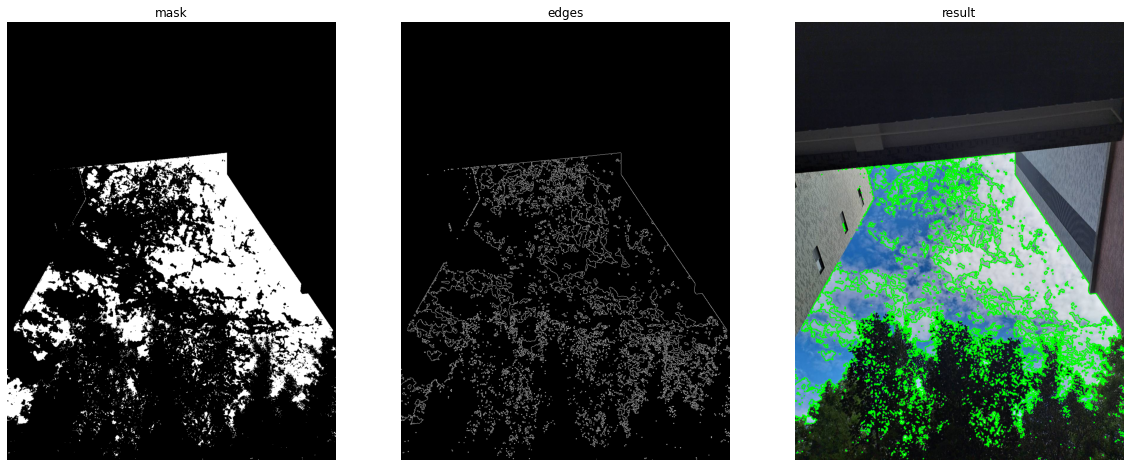

In [198]:
#IMAGE　1
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/original/01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

lower_color = np.array([90, 120, 200]) #play with the number to find the clouds on the image
upper_color = np.array([255, 255, 255])

mask = cv2.inRange(rgb, lower_color, upper_color)
result = cv2.bitwise_and(img, img, mask=mask)
gray_sky = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_sky, 50, 100, apertureSize=3)

# Find contours in the edge image
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

# cv2.imwrite('./images/mask/01.jpg', mask)

fig, ax = plt.subplots(1, 3, figsize=(20,15))
ax[0].imshow(mask, cmap='gray')
ax[0].set_title('mask')
ax[0].axis('off')
ax[1].imshow(edges, cmap='gray')
ax[1].set_title('edges')
ax[1].axis('off')
ax[2].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[2].set_title('result')
ax[2].axis('off')